# Project Statement
You have the 'bank-full.csv' dataset, and your task is to build a machine learning model to predict the 'y' column using these classification algorithms: Logistic Regression, Naive Bayes, SVC Classifier, Decision Tree Classifier, and Random Forest Classifier. Summarize the key steps:

Data Handling: How do you load the dataset and designate 'y' as the target variable?

Data Cleaning: Describe how you'd remove useless columns, eliminate those with unique values, and handle missing data.

Data Visualization: What visualizations would you use for numerical and categorical data?

Data Analysis: Explain univariate, bivariate analysis, and any insights related to the business.

Data Preprocessing: Do you need label encoding, one-hot encoding, standardization, or normalization?

Model Implementation: Briefly outline how you'd implement the mentioned classification algorithms.

Model Validation: Mention the metrics used, especially the R2 score interpretation.

Model Comparison: How would you compare R2 scores and execution speeds to choose the best model?

# Project Overview
The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution.

The classification goal is to predict if the client will subscribe a term deposit (variable y).
The data is related with direct marketing campaigns of a Portuguese banking institution.

The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required,

in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed.

# Data Handling

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv(r"C:\Users\kotes\Downloads\bank-full.csv", sep = ";")

In [3]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [4]:
df.drop_duplicates()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [5]:
# Checking the null values
df.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


# Data Cleaning

In [7]:
df.select_dtypes(include = "object")

,job,marital,education,default,housing,loan,contact,month,poutcome,y
0,management,married,tertiary,no,yes,no,unknown,may,unknown,no
1,technician,single,secondary,no,yes,no,unknown,may,unknown,no
2,entrepreneur,married,secondary,no,yes,yes,unknown,may,unknown,no
3,blue-collar,married,unknown,no,yes,no,unknown,may,unknown,no
4,unknown,single,unknown,no,no,no,unknown,may,unknown,no
...,...,...,...,...,...,...,...,...,...,...
45206,technician,married,tertiary,no,no,no,cellular,nov,unknown,yes
45207,retired,divorced,primary,no,no,no,cellular,nov,unknown,yes
45208,retired,married,secondary,no,no,no,cellular,nov,success,yes
45209,blue-collar,married,secondary,no,no,no,telephone,nov,unknown,no


In [8]:
df.select_dtypes(exclude = "object")

,age,balance,day,duration,campaign,pdays,previous
0,58,2143,5,261,1,-1,0
1,44,29,5,151,1,-1,0
2,33,2,5,76,1,-1,0
3,47,1506,5,92,1,-1,0
4,33,1,5,198,1,-1,0
...,...,...,...,...,...,...,...
45206,51,825,17,977,3,-1,0
45207,71,1729,17,456,2,-1,0
45208,72,5715,17,1127,5,184,3
45209,57,668,17,508,4,-1,0


In [9]:
# Extracting the unique values from categorical columns
for columns in df.select_dtypes(include = "object"):
    unique_values = df[columns].unique()
    print(f"unique values in '{columns}': {unique_values}")

unique values in 'job': ['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']
unique values in 'marital': ['married' 'single' 'divorced']
unique values in 'education': ['tertiary' 'secondary' 'unknown' 'primary']
unique values in 'default': ['no' 'yes']
unique values in 'housing': ['yes' 'no']
unique values in 'loan': ['no' 'yes']
unique values in 'contact': ['unknown' 'cellular' 'telephone']
unique values in 'month': ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']
unique values in 'poutcome': ['unknown' 'failure' 'other' 'success']
unique values in 'y': ['no' 'yes']


In [10]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [11]:
# Let's extract a new feature from 'age' for better visualization
df["age_group"] = ""

for i, row in df.iterrows():
    if row["age"] <= 35:
        df.at[i, "age_group"] = "adults"
    elif row["age"] <= 50:
        df.at[i, "age_group"] = "middle age"
    else:
        df.at[i, "age_group"] = "old"

In [12]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,age_group
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no,old
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no,middle age
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no,adults
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no,middle age
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no,adults


In [13]:
df.query("age_group == 'middle age'")

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,age_group
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no,middle age
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no,middle age
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown,no,middle age
9,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,-1,0,unknown,no,middle age
10,41,admin.,divorced,secondary,no,270,yes,no,unknown,5,may,222,1,-1,0,unknown,no,middle age
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45181,46,blue-collar,married,secondary,no,6879,no,no,cellular,15,nov,74,2,118,3,failure,no,middle age
45197,36,management,single,secondary,no,1511,yes,no,cellular,16,nov,270,1,-1,0,unknown,yes,middle age
45198,37,management,married,tertiary,no,1428,no,no,cellular,16,nov,333,2,-1,0,unknown,no,middle age
45200,38,technician,married,secondary,no,557,yes,no,cellular,16,nov,1556,4,-1,0,unknown,yes,middle age


In [14]:
df.corr()

C:\Users\kotes\AppData\Local\Temp\ipykernel_520\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,age,balance,day,duration,campaign,pdays,previous
age,1.000000,0.097783,-0.009120,-0.004648,0.004760,-0.023758,0.001288
balance,0.097783,1.000000,0.004503,0.021560,-0.014578,0.003435,0.016674
day,-0.009120,0.004503,1.000000,-0.030206,0.162490,-0.093044,-0.051710
duration,-0.004648,0.021560,-0.030206,1.000000,-0.084570,-0.001565,0.001203
campaign,0.004760,-0.014578,0.162490,-0.084570,1.000000,-0.088628,-0.032855
pdays,-0.023758,0.003435,-0.093044,-0.001565,-0.088628,1.000000,0.454820
previous,0.001288,0.016674,-0.051710,0.001203,-0.032855,0.454820,1.000000


# Data Visualization

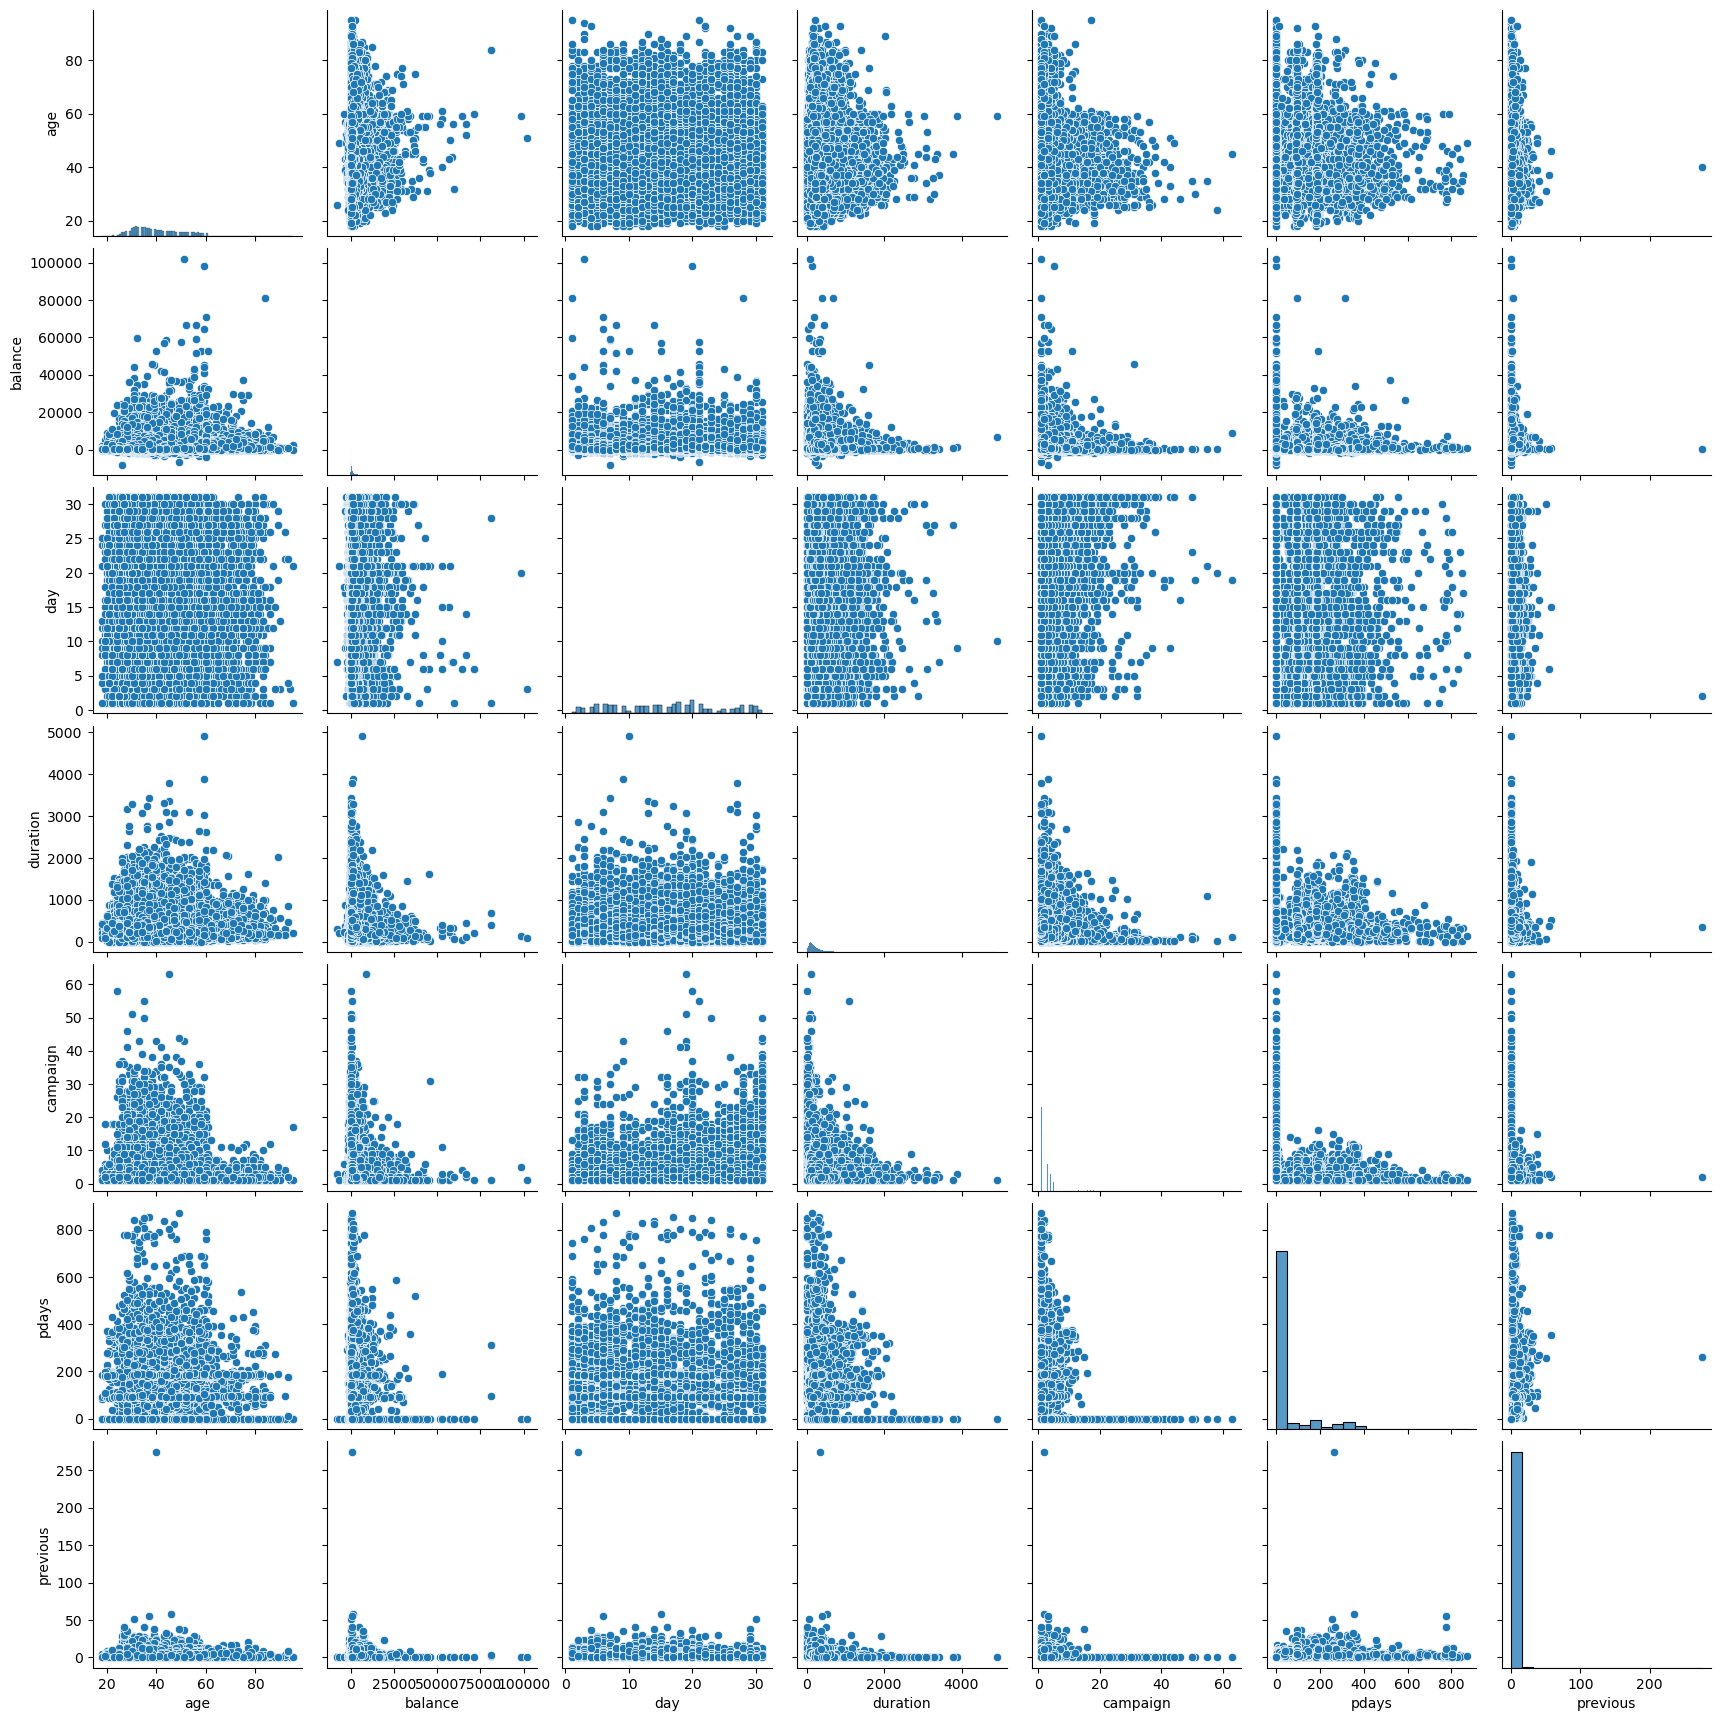

In [15]:
sns.pairplot(df)

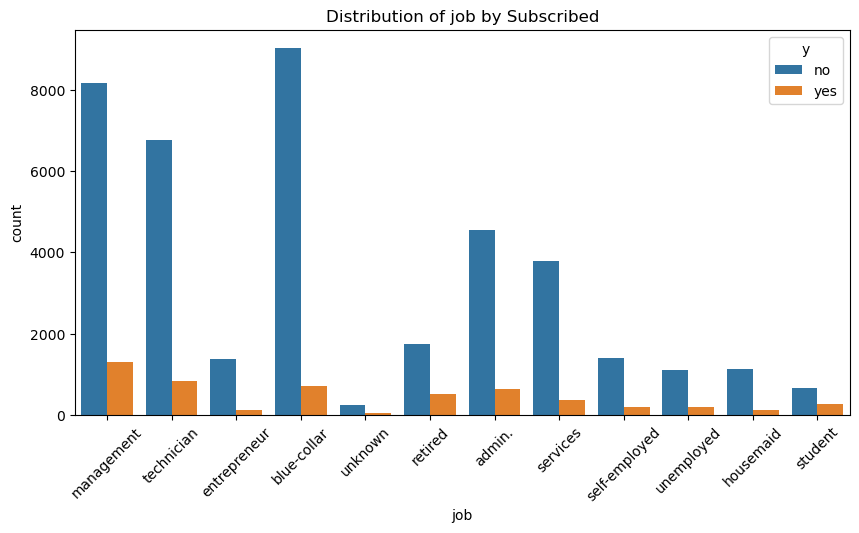

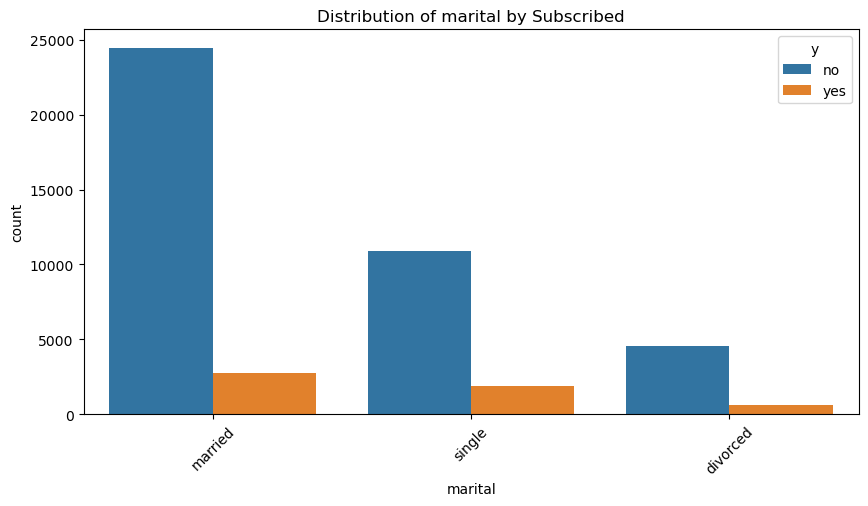

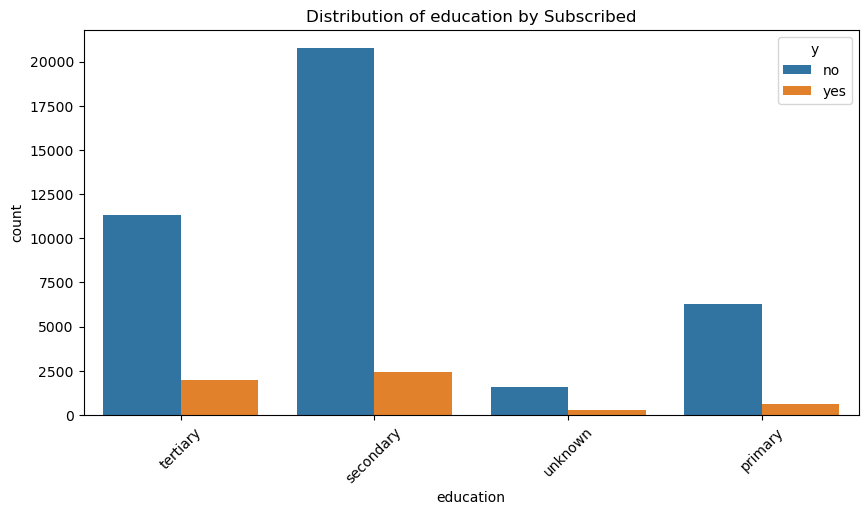

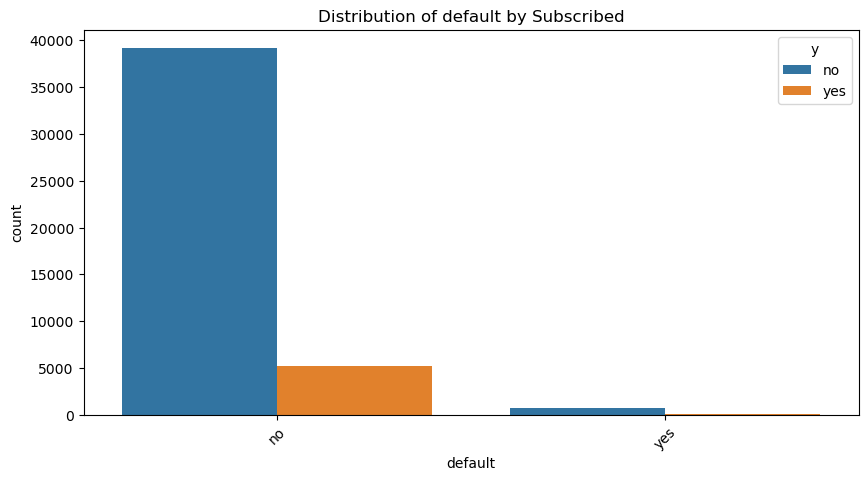

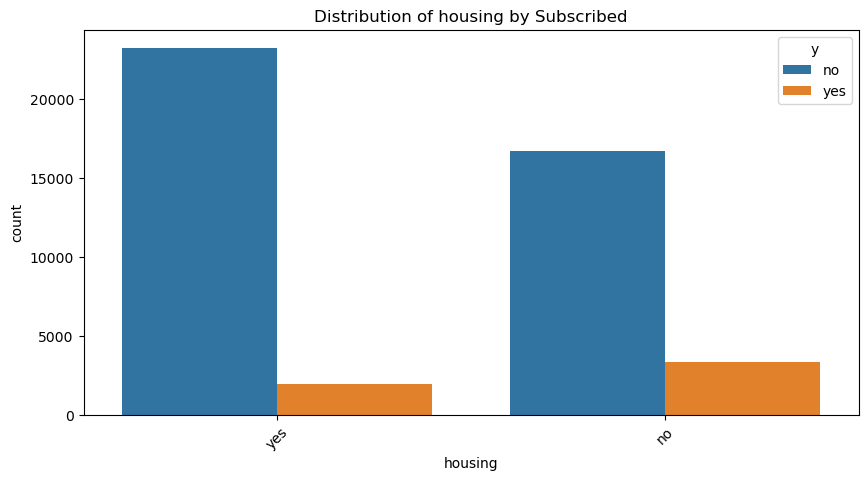

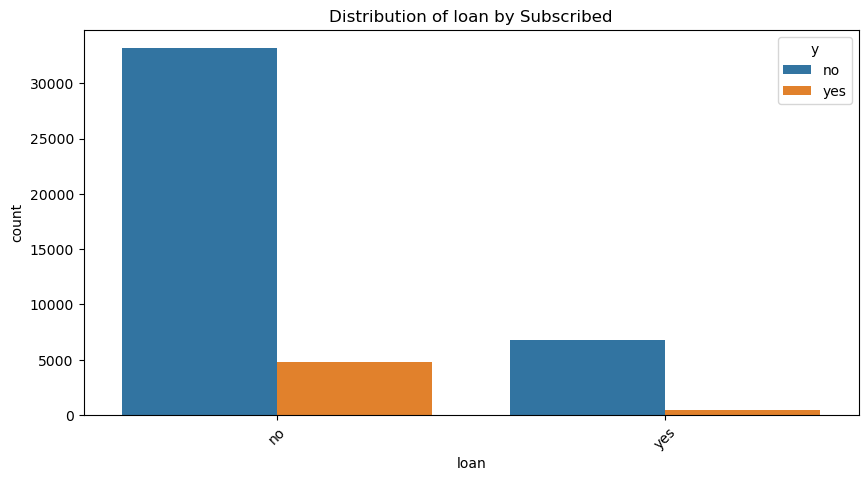

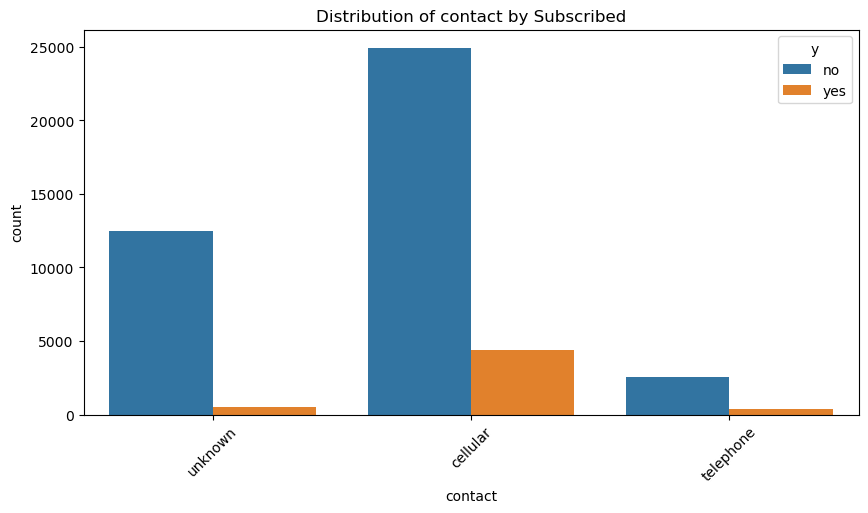

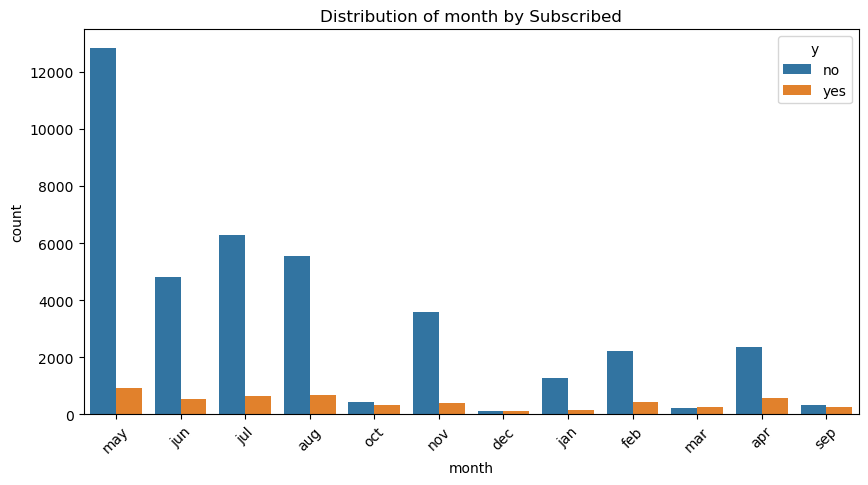

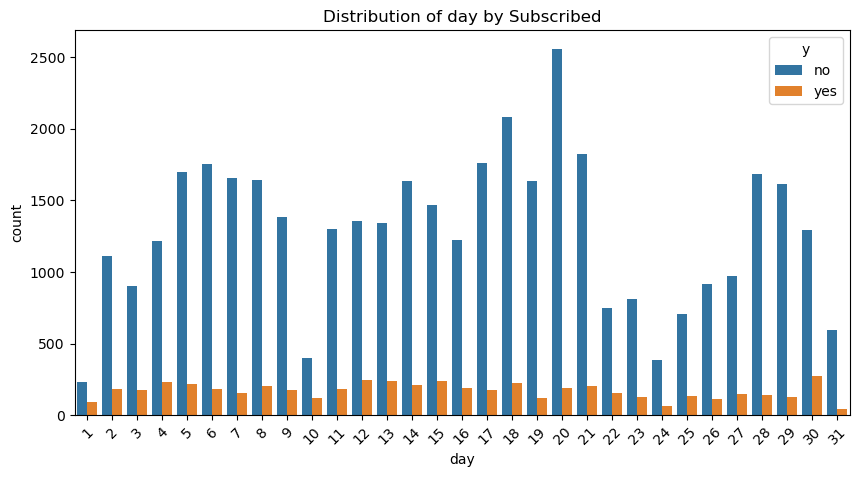

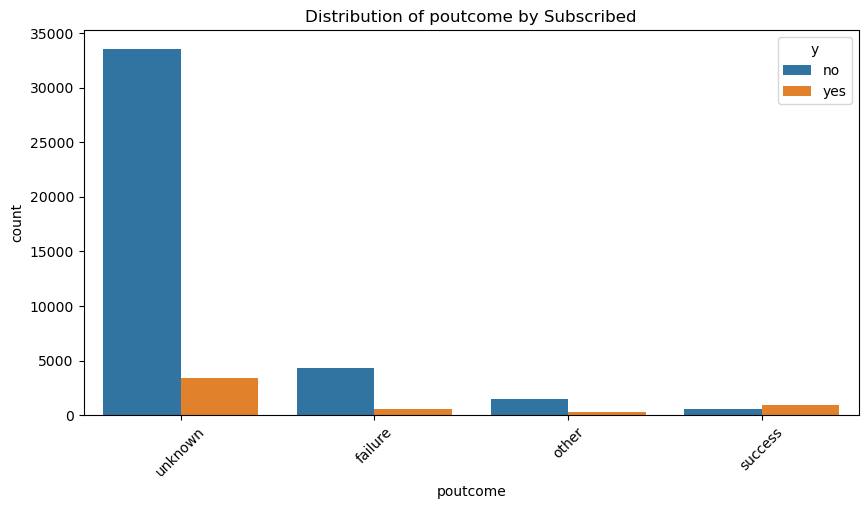

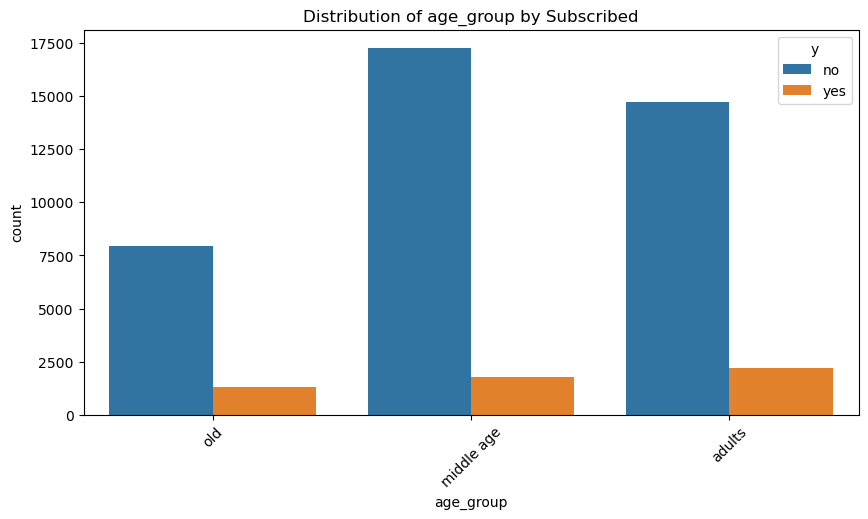

In [16]:
# Bar Plots (Categorical Data)
categorical_features = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day', 'poutcome', 'age_group']
for features in categorical_features:
    plt.figure(figsize=(10, 5))
    sns.countplot(data = df, x = features, hue = 'y')
    plt.title(f'Distribution of {features} by Subscribed')
    plt.xticks(rotation=45)
    plt.show()

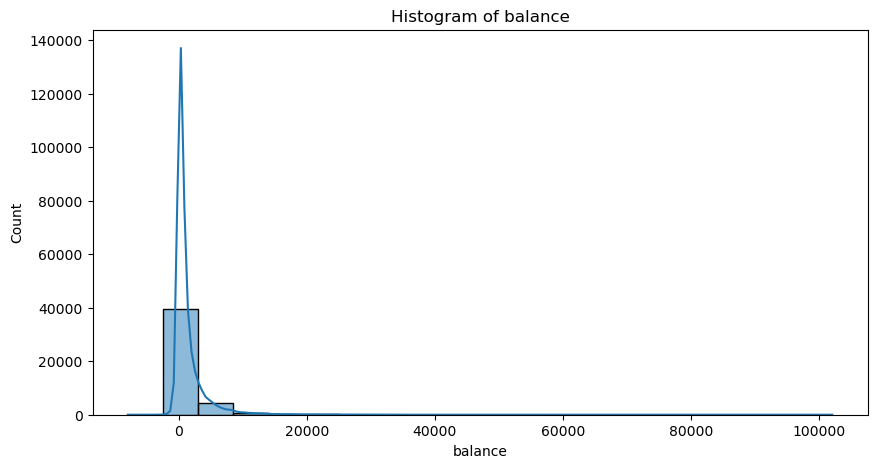

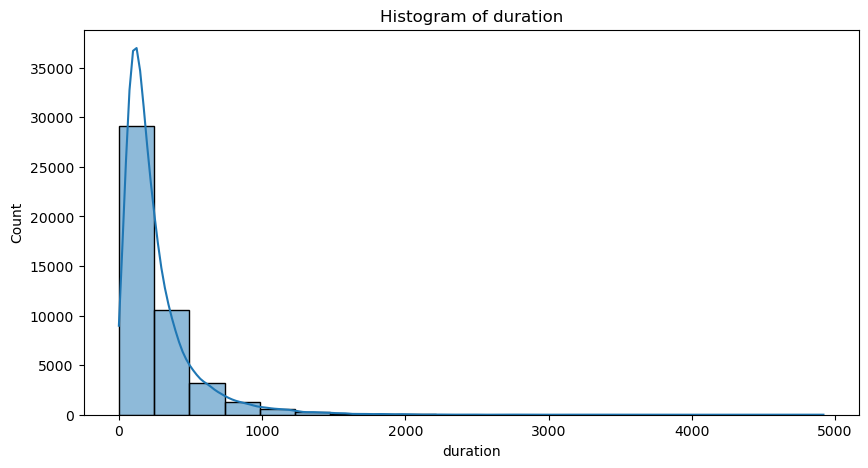

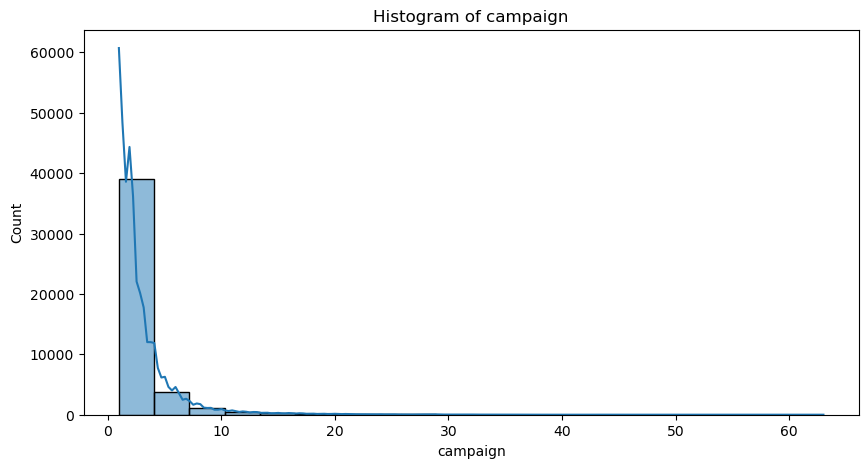

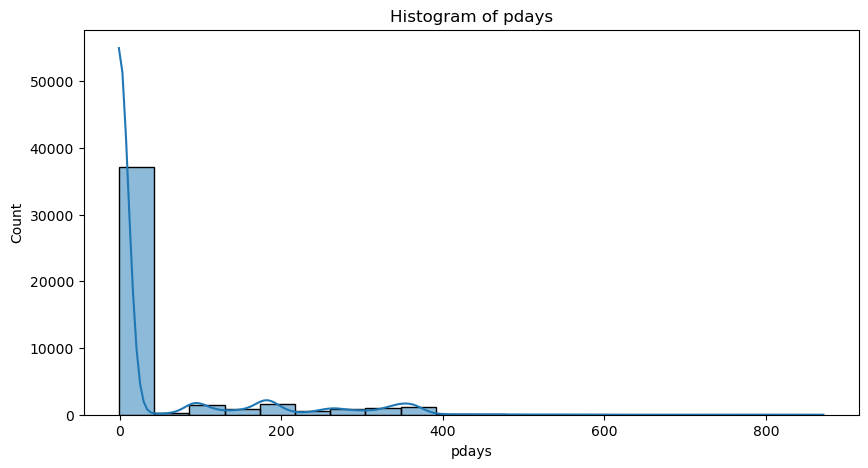

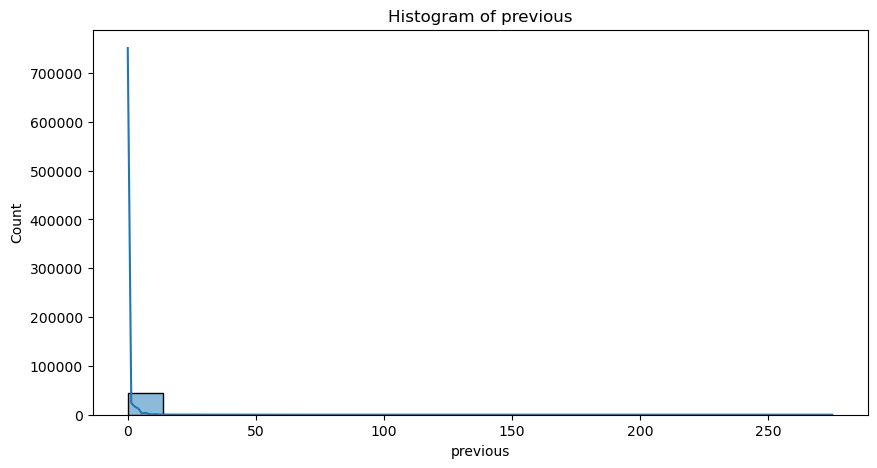

In [17]:
# Histograms (Numerical Data)
numerical_features = ['balance', 'duration', 'campaign', 'pdays', 'previous']
for features in numerical_features:
    plt.figure(figsize=(10, 5))
    sns.histplot(data = df, x = features, bins=20, kde = True)
    plt.title(f'Histogram of {features}')
    plt.show()

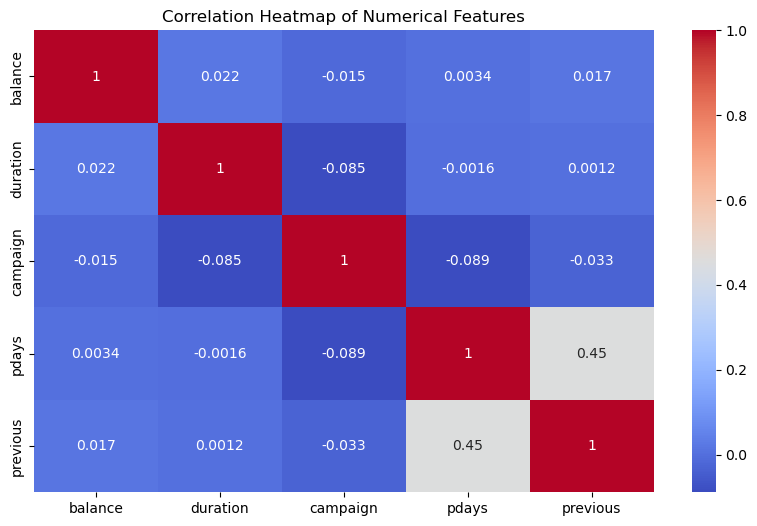

In [18]:
# Correlation Heatmap
correlation_matrix = df[numerical_features].corr()
plt.figure(figsize=(10, 6))
sns.heatmap(data = correlation_matrix, annot = True, cmap = 'coolwarm')
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

# Data Analysis

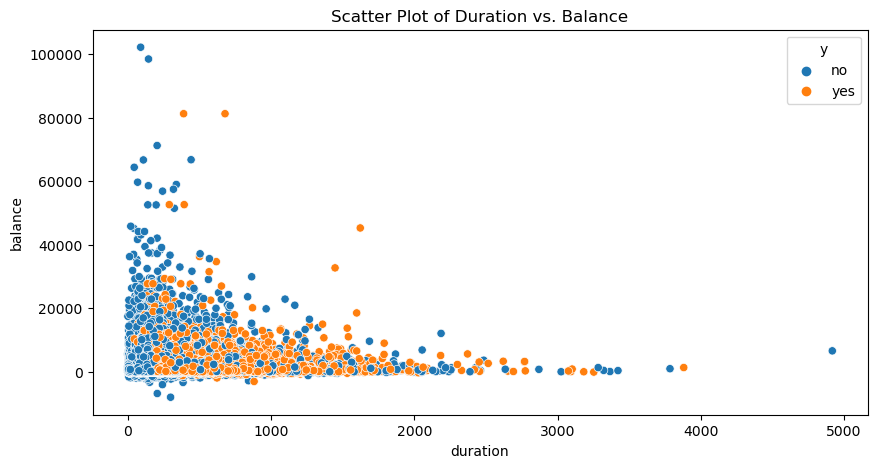

In [19]:
# Scatter Plot
plt.figure(figsize=(10, 5))
sns.scatterplot(data = df, x = 'duration', y = 'balance', hue = 'y')
plt.title('Scatter Plot of Duration vs. Balance')
plt.show()

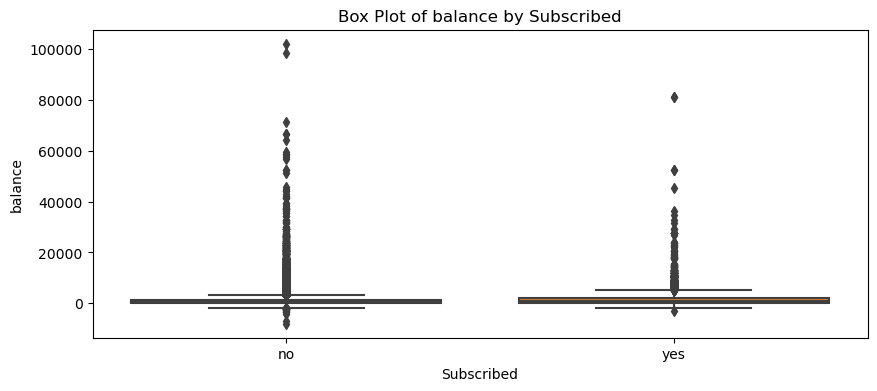

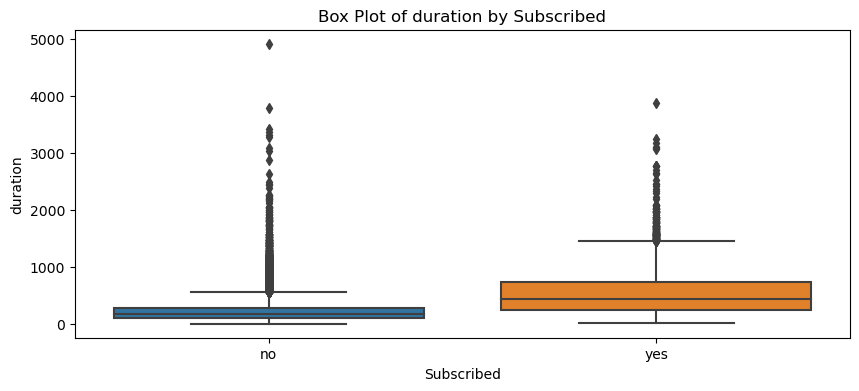

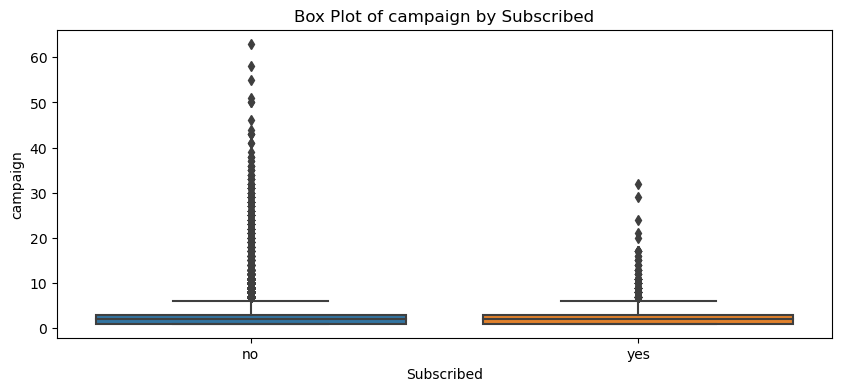

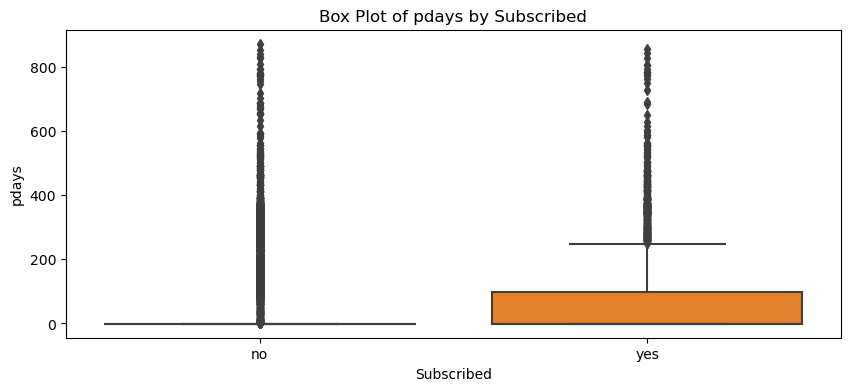

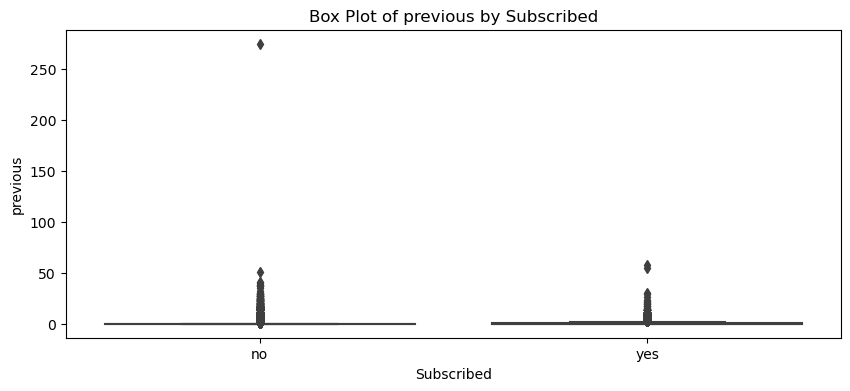

In [20]:
for features in numerical_features:
    plt.figure(figsize=(10, 4))
    sns.boxplot(data = df, x = 'y', y = features)
    plt.title(f'Box Plot of {features} by Subscribed')
    plt.xlabel('Subscribed')
    plt.ylabel(features)
    plt.show()

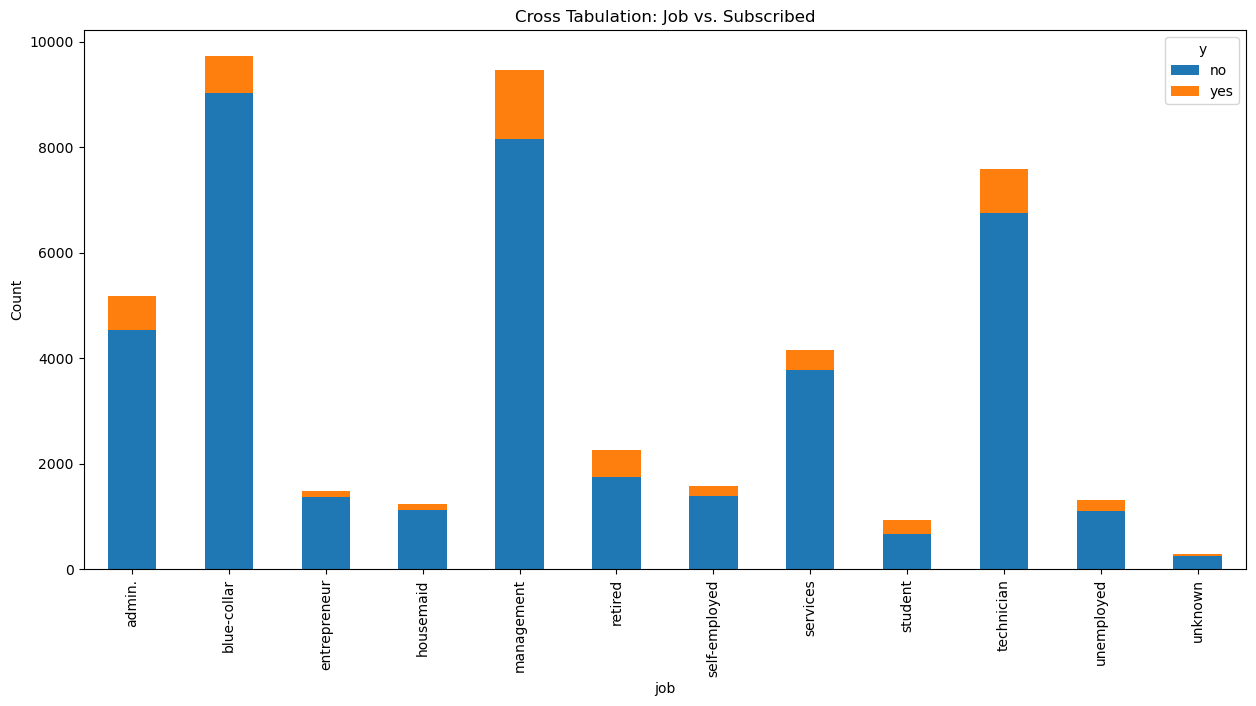

In [21]:
# Cross Tabulations
cross_tab = pd.crosstab(df['job'], df['y'])
cross_tab.plot(kind = 'bar', stacked = True, figsize = (15, 7))
plt.title('Cross Tabulation: Job vs. Subscribed')
plt.ylabel('Count')
plt.show()

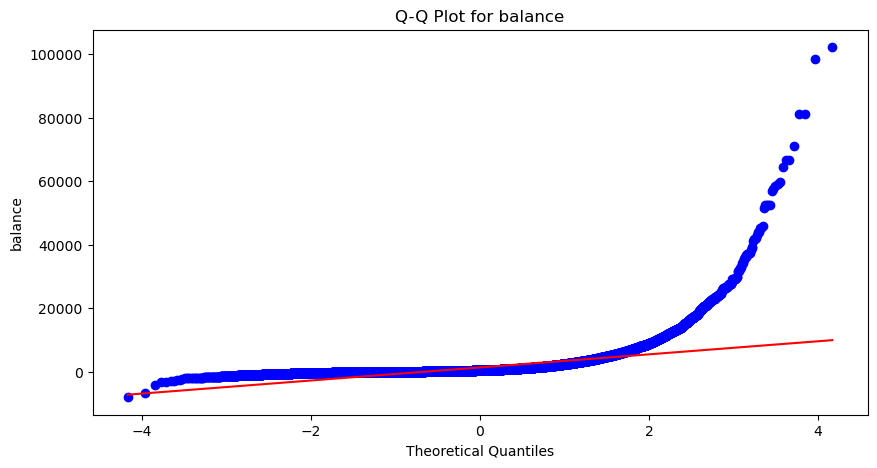

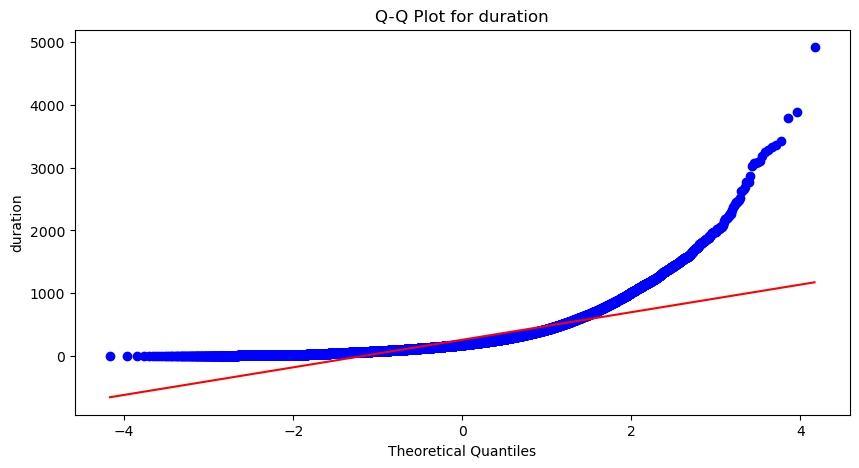

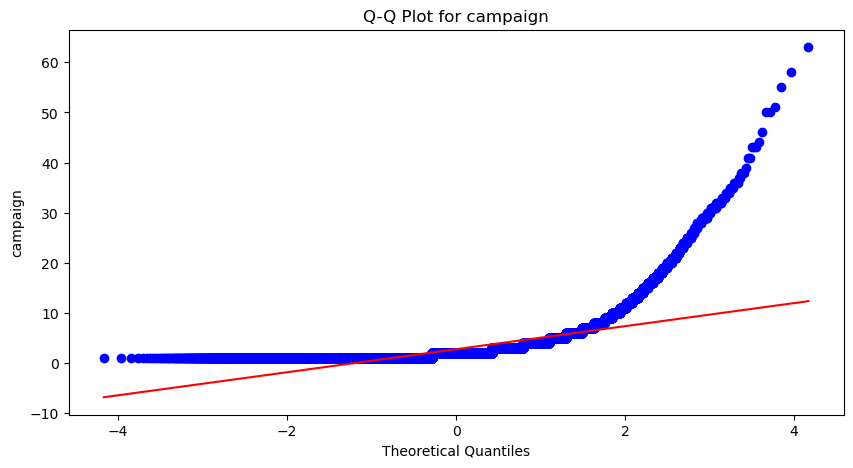

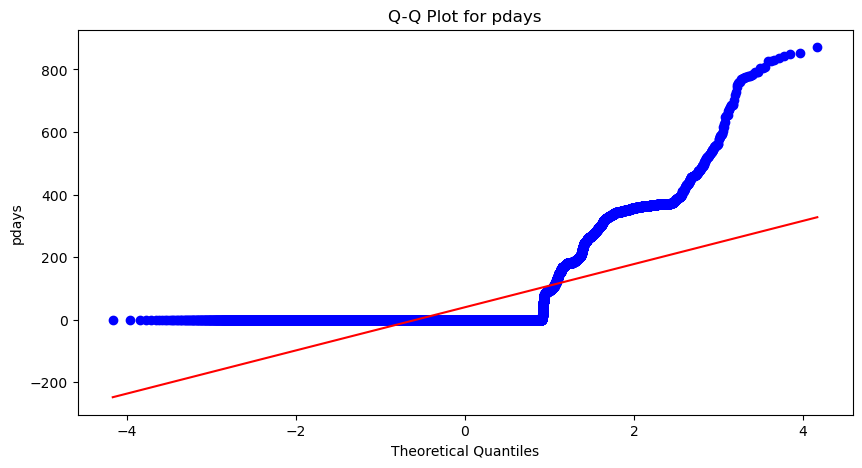

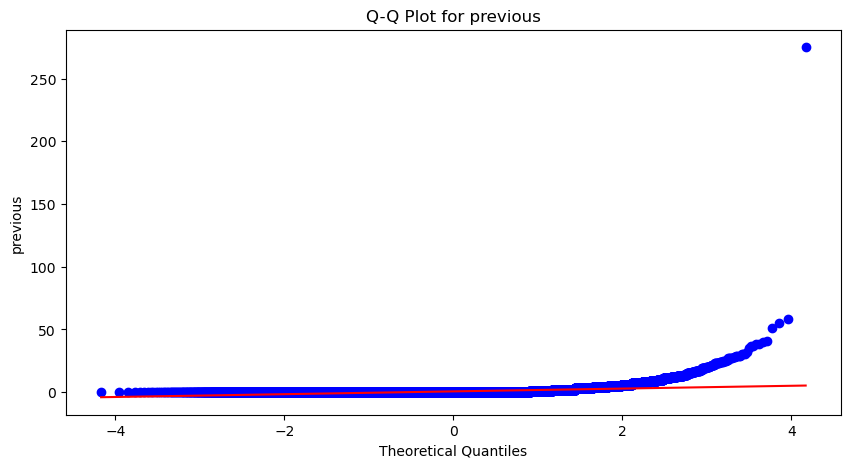

In [22]:
import scipy.stats as stats
for feature in numerical_features:
    plt.figure(figsize=(10, 5))
    stats.probplot(df[feature], dist = "norm", plot = plt)
    plt.title(f'Q-Q Plot for {feature}')
    plt.xlabel('Theoretical Quantiles')
    plt.ylabel(feature)
    plt.show()


In [23]:
# Counting the number of "unknown" values for each categorical feature
unknown_value_counts = (df == "unknown").sum()
unknown_value_counts

age              0
job            288
marital          0
education     1857
default          0
balance          0
housing          0
loan             0
contact      13020
day              0
month            0
duration         0
campaign         0
pdays            0
previous         0
poutcome     36959
y                0
age_group        0
dtype: int64

In [24]:
# Let's check whether the dataset is balanced or imbalanced

# Calculating the class count of target variable
class_count = df.y.value_counts()

# Calculating the class count proportion of target variable
class_proportions = class_count / class_count.sum()

class_count

no     39922
yes     5289
Name: y, dtype: int64

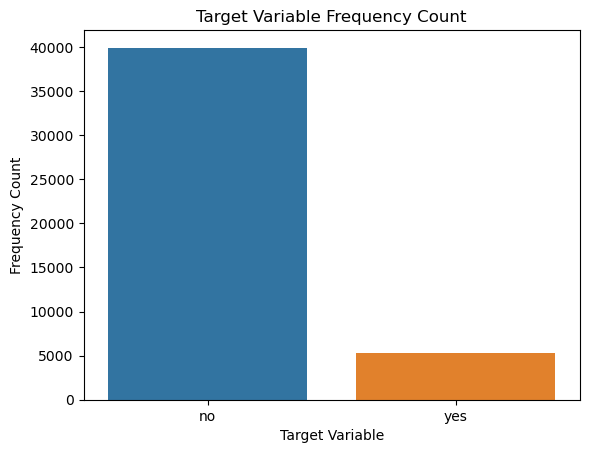

In [25]:
sns.countplot(data = df, x = "y")
plt.xlabel("Target Variable")
plt.ylabel("Frequency Count")
plt.title("Target Variable Frequency Count");

# Data Preprocessing

In [26]:
# Encoding the target variable
mapping = {"no":0, "yes":1}
df["target"] = df["y"].map(mapping)
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,age_group,target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no,old,0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no,middle age,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no,adults,0
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no,middle age,0
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no,adults,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes,old,1
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes,old,1
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes,old,1
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no,old,0


In [27]:
df.drop(["y", "age"],axis = 1, inplace = True)

In [28]:
df

,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,age_group,target
0,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,old,0
1,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,middle age,0
2,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,adults,0
3,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,middle age,0
4,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,adults,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,old,1
45207,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,old,1
45208,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,old,1
45209,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,old,0


# Encoding
Encoding is a technique of converting categorical variables into numerical values so that it could be easily fitted to a machine learning model.

In [29]:
# Encoding categorical variables into numerics

nominal_columns = df.select_dtypes(include = "object").columns.tolist()
nominal_columns

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'poutcome',
 'age_group']

In [30]:
# One Hot Encoding
df_encoded = pd.get_dummies(df, columns = nominal_columns)
df_encoded.head()

,balance,day,duration,campaign,pdays,previous,target,job_admin.,job_blue-collar,job_entrepreneur,...,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,age_group_adults,age_group_middle age,age_group_old
0,2143,5,261,1,-1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
1,29,5,151,1,-1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
2,2,5,76,1,-1,0,0,0,0,1,...,0,0,0,0,0,0,1,1,0,0
3,1506,5,92,1,-1,0,0,0,1,0,...,0,0,0,0,0,0,1,0,1,0
4,1,5,198,1,-1,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0


In [31]:
# !pip install imbalanced-learn

# OverSampling 
Over sampling is used when the amount of data collected is insufficient.
When one class of data is the underrepresented minority class in the data sample, over sampling techniques maybe used to duplicate these results for a more balanced amount of positive results in training.

In [32]:
# Performing over sampling on the data to make it balanced
from imblearn.over_sampling import SMOTE
from collections import Counter

# seperating feature and target
x = df_encoded.drop(["target"], axis = 1)
y = df_encoded["target"]

# Instantiate SMOTE
smote = SMOTE()

# Perform oversampling
x_resampled, y_resampled = smote.fit_resample(x, y)

print("Class distribution before over sampling:", Counter(y))
print("Class distribution after over sampling:", Counter(y_resampled))

Class distribution before over sampling: Counter({0: 39922, 1: 5289})
Class distribution after over sampling: Counter({0: 39922, 1: 39922})


In [33]:
x_resampled.head()

,balance,day,duration,campaign,pdays,previous,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,...,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,age_group_adults,age_group_middle age,age_group_old
0,2143,5,261,1,-1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
1,29,5,151,1,-1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
2,2,5,76,1,-1,0,0,0,1,0,...,0,0,0,0,0,0,1,1,0,0
3,1506,5,92,1,-1,0,0,1,0,0,...,0,0,0,0,0,0,1,0,1,0
4,1,5,198,1,-1,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0


In [34]:
y_resampled.head()

0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int64

# Model Implementation

In [35]:
from sklearn.model_selection import train_test_split, GridSearchCV
x_train, x_test, y_train, y_test = train_test_split(x_resampled, y_resampled, random_state = 45, test_size = 0.25)
x_train

,balance,day,duration,campaign,pdays,previous,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,...,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,age_group_adults,age_group_middle age,age_group_old
4526,2007,20,253,1,-1,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
4623,410,20,112,2,-1,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
58897,1941,4,1228,3,-1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
50389,7,19,929,3,-1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
78113,7,21,858,4,-1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12895,85,7,88,1,-1,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
60960,1039,9,228,3,-1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
6012,576,26,158,4,-1,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
63107,2155,17,872,2,98,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [36]:
y_train

4526     0
4623     0
58897    1
50389    1
78113    1
        ..
12895    0
60960    1
6012     0
63107    1
6558     0
Name: target, Length: 59883, dtype: int64

In [37]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score

# LogisticRegression
Logistic Regression is a Machine Learning classification algorithm that is used to predict the probability of a categorical dependent variable.

In [38]:
lr=LogisticRegression()
lr.fit(x_train, y_train)

C:\Users\kotes\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [39]:
lr.predict(x_test)

array([0, 0, 0, ..., 0, 0, 1], dtype=int64)

In [40]:
lr.score(x_test , y_test)

0.8867291217874856

# DecisionTree Classifier
A decision tree is a type of supervised machine learning used to categorize or make predictions based on how a previous set of questions were answered. The model is a form of supervised learning, meaning that the model is trained and tested on a set of data that contains the desired categorization.

In [41]:
decisionTree = DecisionTreeClassifier()
decisionTree.fit(x_train, y_train)

DecisionTreeClassifier()

In [42]:
decisionTree.predict(x_test)

array([0, 0, 0, ..., 0, 0, 1], dtype=int64)

In [43]:
decisionTree.score(x_test,y_test)

0.9270577626371425

# RandomForest Classifier
A random forest is a meta estimator that fits a number of decision tree classifiers on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting.

In [44]:
randomForest = RandomForestClassifier(n_estimators = 1000)
randomForest.fit(x_train, y_train)

RandomForestClassifier(n_estimators=1000)

In [45]:
randomForest.predict(x_test)

array([0, 0, 0, ..., 0, 0, 1], dtype=int64)

In [46]:
randomForest.score(x_test, y_test)

0.9497520164320424

In [47]:
# Standardize features
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.fit_transform(x_test)

In [48]:
from sklearn.metrics import classification_report, accuracy_score

# Naive Bayes
Naïve Bayes Classifier is one of the simple and most effective Classification algorithms which helps in building the fast 
machine learning models that can make quick predictions.

In [49]:
# Naive Bayes (Gaussian) - No Hyperparameter Tuning Needed
nb_model = GaussianNB()
nb_model.fit(x_train_scaled, y_train)
y_pred_nb = nb_model.predict(x_test_scaled)
model_test_r2_nb = r2_score(y_test,y_pred_nb)
print("\nNaive Bayes (Gaussian):")
print(classification_report(y_test, y_pred_nb))
print("Accuracy:", accuracy_score(y_test, y_pred_nb))
print("-->model_test_r2: {:.4f}".format(model_test_r2_nb))


Naive Bayes (Gaussian):
              precision    recall  f1-score   support

           0       0.88      0.90      0.89     10014
           1       0.90      0.87      0.89      9947

    accuracy                           0.89     19961
   macro avg       0.89      0.89      0.89     19961
weighted avg       0.89      0.89      0.89     19961

Accuracy: 0.8875306848354291
-->model_test_r2: 0.5501


In [50]:
# Decision Tree with Hyperparameter Tuning
dt_model = DecisionTreeClassifier()
dt_params = {'max_depth': [None, 10, 20], 'min_samples_split': [2, 5, 10]}
dt_grid = GridSearchCV(dt_model, dt_params, cv=5)
dt_grid.fit(x_train_scaled, y_train)
dt_best = dt_grid.best_estimator_
y_pred_dt = dt_best.predict(x_test_scaled)
model_test_r2_dc = r2_score(y_test,y_pred_dt)
print("\nDecision Tree:")
print(classification_report(y_test, y_pred_dt))
print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print("-->model_test_r2: {:.4f}".format(model_test_r2_dc))


Decision Tree:
              precision    recall  f1-score   support

           0       0.93      0.93      0.93     10014
           1       0.93      0.93      0.93      9947

    accuracy                           0.93     19961
   macro avg       0.93      0.93      0.93     19961
weighted avg       0.93      0.93      0.93     19961

Accuracy: 0.9295125494714693
-->model_test_r2: 0.7180


In [51]:
# Logistic Regression with Hyperparameter Tuning
lr_model = LogisticRegression()
lr_params = {'C': [0.01, 0.1, 1, 10]}
lr_grid = GridSearchCV(lr_model, lr_params, cv = 5)
lr_grid.fit(x_train_scaled, y_train)
lr_best = lr_grid.best_estimator_
y_pred_lr = lr_best.predict(x_test_scaled)
model_test_r2_lr= r2_score(y_test,y_pred_lr)
print("Logistic Regression:")
print(classification_report(y_test, y_pred_lr))
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print("-->model_test_r2: {:.4f}".format(model_test_r2_lr))

C:\Users\kotes\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\kotes\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

Logistic Regression:
              precision    recall  f1-score   support

           0       0.92      0.98      0.95     10014
           1       0.97      0.91      0.94      9947

    accuracy                           0.94     19961
   macro avg       0.95      0.94      0.94     19961
weighted avg       0.95      0.94      0.94     19961

Accuracy: 0.9439406843344522
-->model_test_r2: 0.7758


C:\Users\kotes\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [52]:
# Random Forest with Hyperparameter Tuning
rf_model = RandomForestClassifier()
rf_params = {'n_estimators': [100, 200, 300], 'max_depth': [None, 10, 20]}
rf_grid = GridSearchCV(rf_model, rf_params, cv=5)
rf_grid.fit(x_train_scaled, y_train)
rf_best = rf_grid.best_estimator_
y_pred_rf = rf_best.predict(x_test_scaled)
model_test_r2_rf = r2_score(y_test,y_pred_rf)
print("Random Forest:")
print(classification_report(y_test, y_pred_rf))
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("-->model_test_r2: {:.4f}".format(model_test_r2_rf))

Random Forest:
              precision    recall  f1-score   support

           0       0.93      0.97      0.95     10014
           1       0.97      0.93      0.95      9947

    accuracy                           0.95     19961
   macro avg       0.95      0.95      0.95     19961
weighted avg       0.95      0.95      0.95     19961

Accuracy: 0.9484995741696308
-->model_test_r2: 0.7940


# Support Vector Classifier (SVC)

In [53]:
#from sklearn.svm import SVC 
#svc_model = SVC()  
#svc_params = {'C': [0.1, 1, 10],  'gamma': [0.1, 1, 'scale'], 'kernel': ['linear', 'rbf']}   
#svc_grid = GridSearchCV(svc_model, svc_params, cv=5)
#svc_grid.fit(x_train_scaled, y_train)
#svc_best = svc_grid.best_estimator_
#y_pred_svc = svc_best.predict(x_test_scaled)
#print("Support Vector Classifier:")
#print(classification_report(y_test, y_pred_svc))
#print("Accuracy:", accuracy_score(y_test, y_pred_svc))

# Metrics for Model 

C:\Users\kotes\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


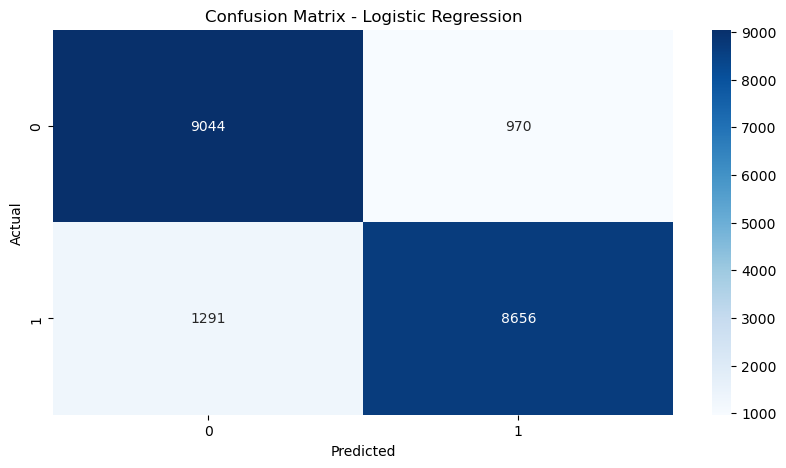

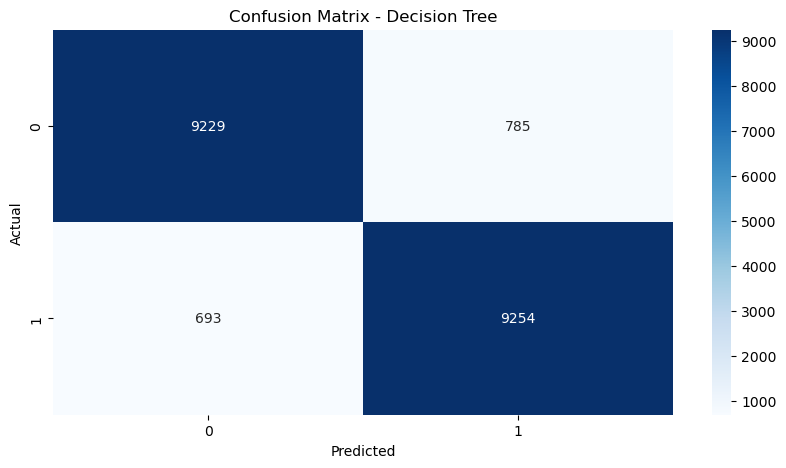

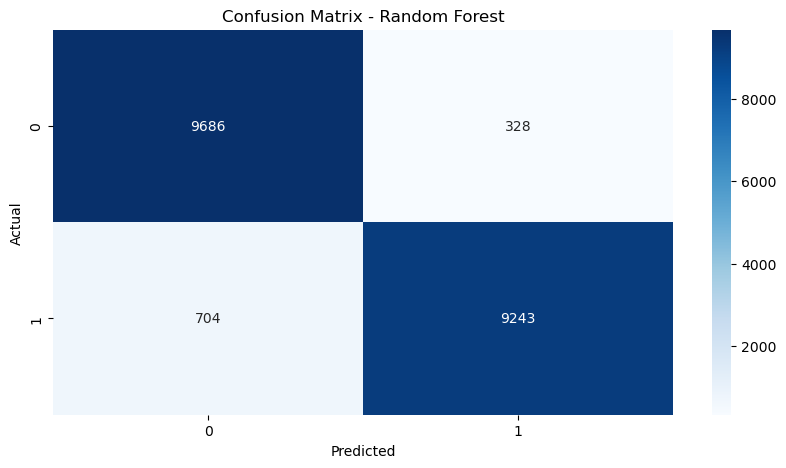

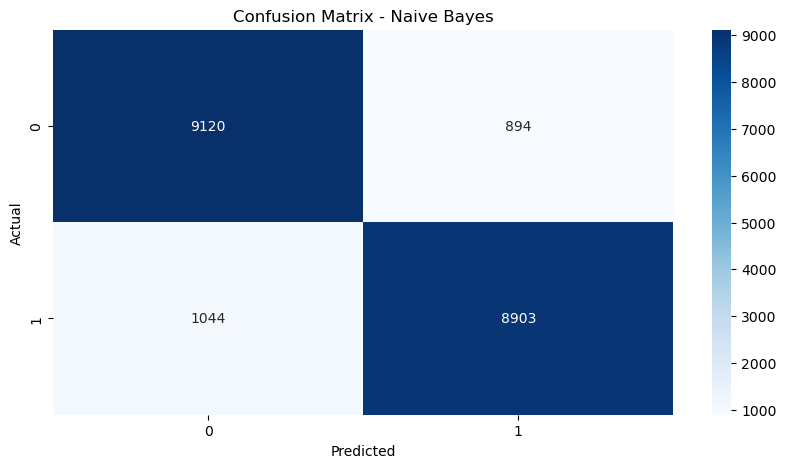

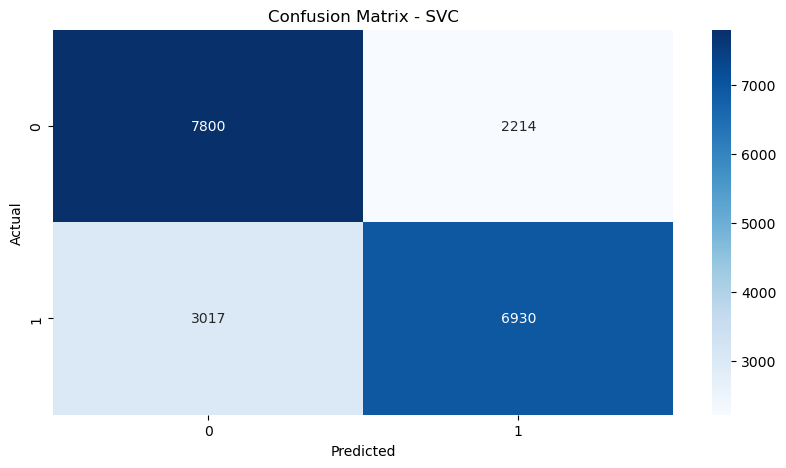

In [54]:
from sklearn.metrics import confusion_matrix
# Create a dictionary to store models and their names
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Naive Bayes': GaussianNB(),
    'SVC': SVC(),
    }
# Loop through each model, train, predict, and compute confusion matrix
for name, model in models.items():
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    cm = confusion_matrix(y_test, y_pred)
    
    plt.figure(figsize=(10, 5))
    sns.heatmap(cm, annot = True, fmt ='d', cmap = 'Blues')
    plt.title(f'Confusion Matrix - {name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

C:\Users\kotes\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


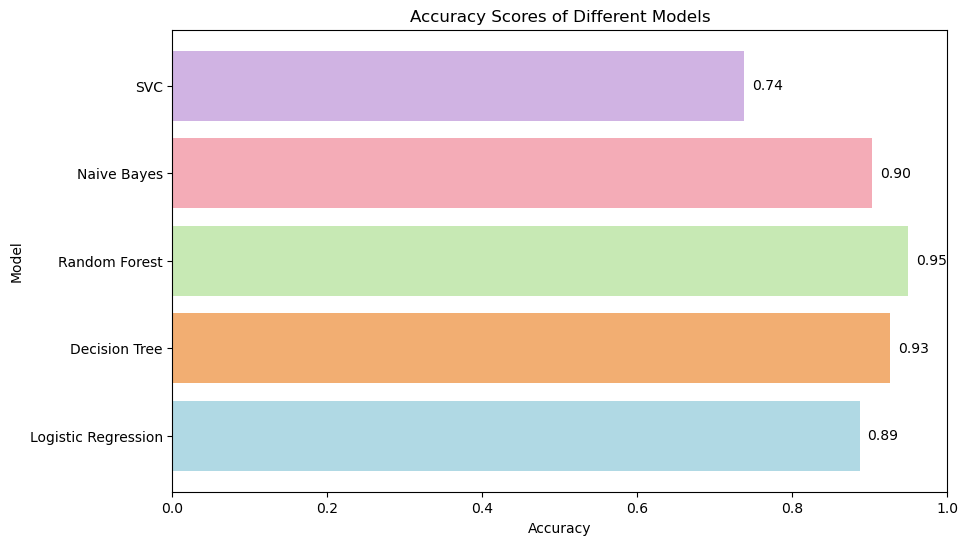

In [55]:
# Create a dictionary to store models and their names
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Naive Bayes': GaussianNB(),
    'SVC': SVC(),
}
# Initialize lists to store model names and accuracy scores
model_names = []
accuracy_scores = []

# Loop through each model, train, predict, and store accuracy
for name, model in models.items():
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    
    model_names.append(name)
    accuracy_scores.append(accuracy)

# Define colors for each bar
colors = ['#b0d9e4', '#f2ae72', '#c7e9b4', '#f4acb7', '#d0b3e3', '#f9d3d3', '#d9d9d9', 'skyblue']
# Plot the accuracy scores
plt.figure(figsize=(10, 6))
plt.barh(model_names, accuracy_scores, color = colors)
plt.xlabel('Accuracy')
plt.ylabel('Model')
plt.title('Accuracy Scores of Different Models')
plt.xlim(0, 1)  # Set x-axis limit to better visualize differences

# Label the accuracy scores on the bars
for i, acc in enumerate(accuracy_scores):
    plt.text(acc + 0.01, i, f'{acc:.2f}', va = 'center')

plt.show()

# Cross-Validation
Cross-validation is a statistical method used to estimate the performance of machine learning models.

It's a process to avoid overfitting and underfitting of data.

Overfitting
Overfitting happens when a model learns the detail and noise in the training data to the extent that it negatively

impacts the performance of the model on new data.
Underfitting
Underfitting destroys the accuracy of our machine learning model. Its occurrence simply means that our model or the algorithm

does not fit the data well enough. It usually happens when we have fewer data to build an accurate model and also when

we try to build a linear model with fewer non-linear data.

In [56]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
skfold = StratifiedKFold(n_splits=5)
model = DecisionTreeClassifier(random_state=40)
scores=cross_val_score(model,x_train,y_train,cv=skfold)
print(np.mean(scores))

0.9229998808114127


In [57]:
scores

array([0.92185021, 0.92293563, 0.92235117, 0.9254342 , 0.92242819])

# Model Validation

In [58]:
#r2_Scores
data = {'model_name': ["RandomForestClassifier",'DecisionTreeClassifier',"GaussianNB","LogisticRegression"],
        'r2_score': [model_test_r2_lr,model_test_r2_rf,model_test_r2_dc,model_test_r2_nb]
        }

df_ = pd.DataFrame(data)

print(df_)

               model_name  r2_score
0  RandomForestClassifier  0.775760
1  DecisionTreeClassifier  0.793996
2              GaussianNB  0.718047
3      LogisticRegression  0.550118


# Model Comparison

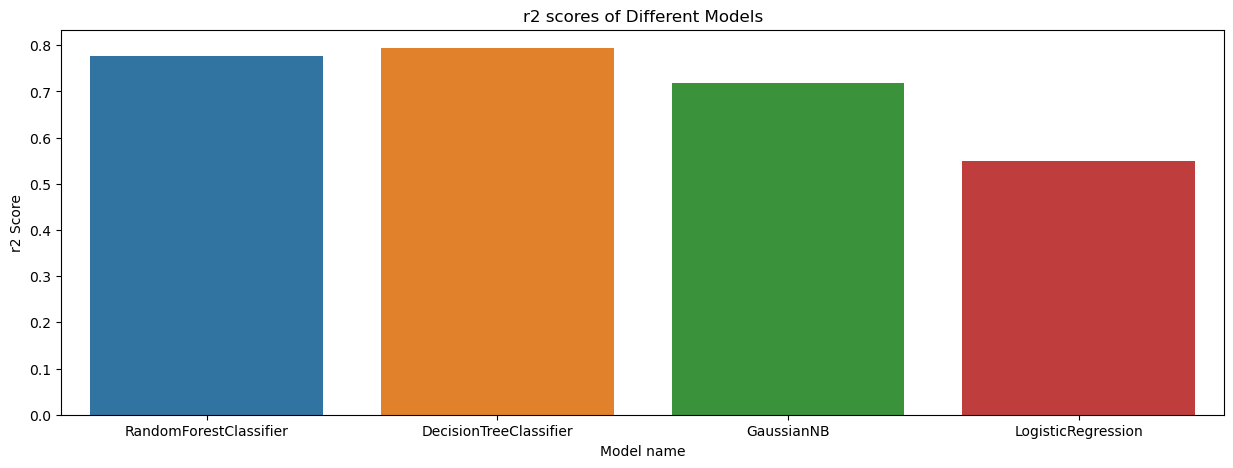

In [59]:
x_ax=df_['model_name']
y_ax=df_['r2_score']
fig = plt.figure(figsize = (15, 5))
sns.barplot(y ='r2_score',x ='model_name',data=df_)
plt.xlabel("Model name")
plt.ylabel("r2 Score")
plt.title("r2 scores of Different Models")
plt.show()

# Conclusion
The dataset contained 16 features and 1 target variable for binary classification which determines if client will subscribe deposit or not.With the given bank data, we implemented Exploratory Data Analysis, Visualized the data, Machine Learning models and evaluated the model. After pre-processsing the data, then applied various classification algorithms on the data which made it clear that Random Forest Classifier Model performed with high accuracy compared to other algorithms.

The SVC code cell is not running for me since from three days I have tried in many ways but is not running So that I made it that particular cell as comments. 